<a href="https://colab.research.google.com/github/learn-co-curriculum/ds-skills2-variable-assignment/blob/master/EDA_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exploratory Data Analysis***

In [ ]:
#load modules
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [ ]:
#upload data set
df = pd.read_csv('/content/AmesHousing.csv')

## ***Step 1. Inspect Your Data set***

In [ ]:
#inspect dataframe
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
#get number of columns and rows
df.shape

(2930, 82)

In [ ]:
#look at column names
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

## ***Step 2. Generate Basic Statisics***

In [ ]:
#inspect number of, types of column, size of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
#basic descriptive statistics
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## ***Step 3: Check for Missing Values***

In [ ]:
#check for missing values
df.isnull().sum().sort_values(ascending=False)[:25]

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Area          1
Garage Cars          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
dtype: int64

In [ ]:
#get percent missing for each column
df_miss = df.isnull().sum() * 100 / len(df)

In [ ]:
#show columns with highest percent missing
df_miss.sort_values(ascending=False)[:25]

Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Qual        5.426621
Garage Yr Blt      5.426621
Garage Cond        5.426621
Garage Finish      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
BsmtFin Type 1     2.730375
Bsmt Cond          2.730375
Bsmt Qual          2.730375
Mas Vnr Type       0.784983
Mas Vnr Area       0.784983
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Garage Area        0.034130
Garage Cars        0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
BsmtFin SF 2       0.034130
dtype: float64

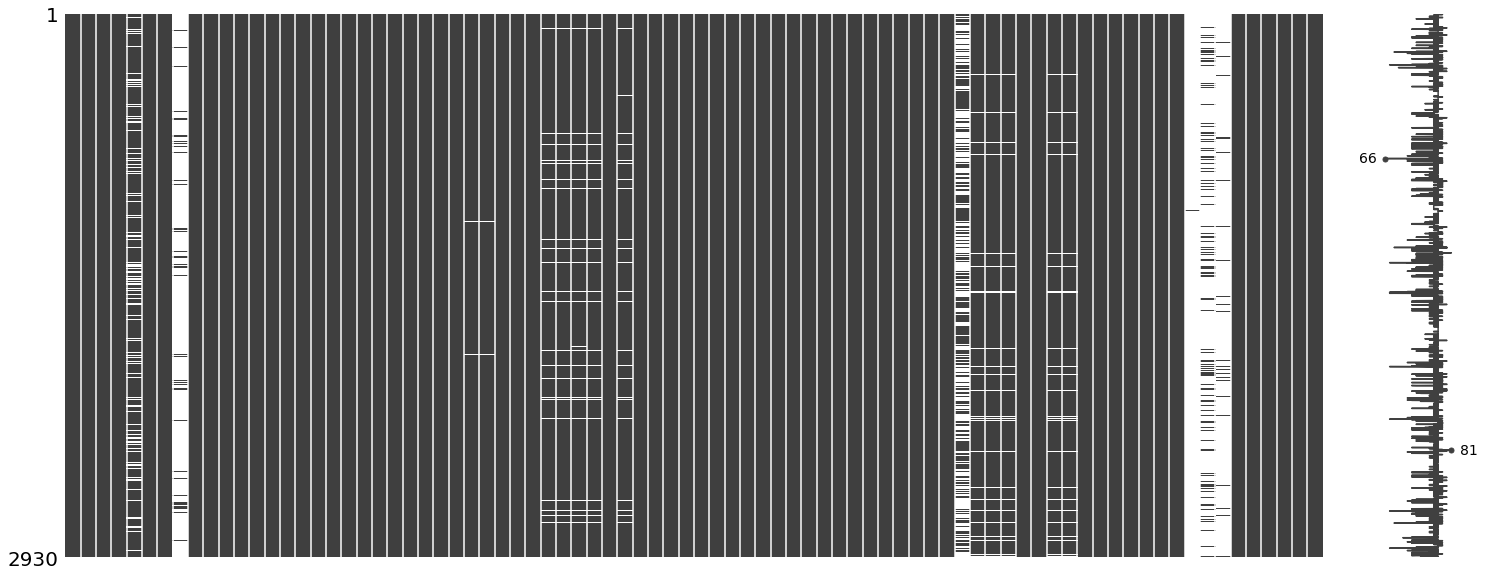

In [ ]:
#view a matrix of missingnes in dataframe
msno.matrix(df)

In [ ]:
#inspect columns with high missingness
df['Fireplace Qu'].value_counts(dropna=False)

NaN    1422
Gd      744
TA      600
Fa       75
Po       46
Ex       43
Name: Fireplace Qu, dtype: int64

In [ ]:
#inspect nature of missingness
df['Fence'].value_counts(dropna=False)

NaN      2358
MnPrv     330
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [ ]:
#drop columns with highest missingness
df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 'Lot Frontage'], axis=1, inplace=True)

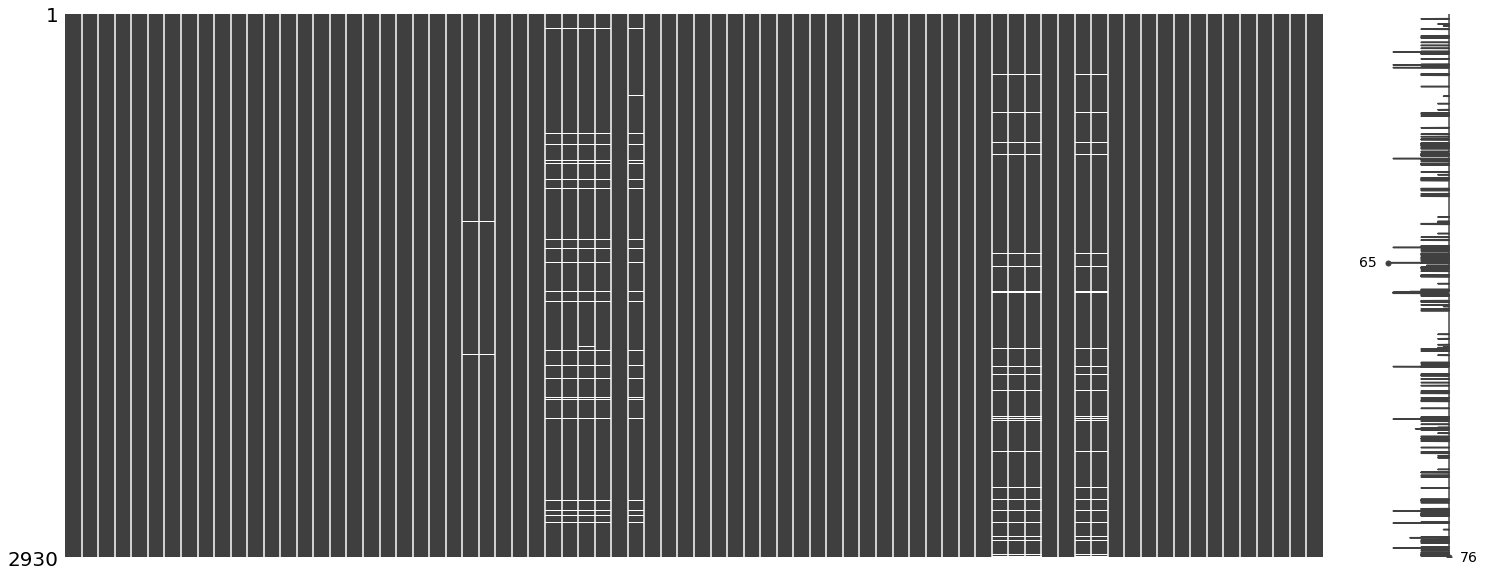

In [ ]:
#check matrix of missingness after dropping columns
msno.matrix(df)

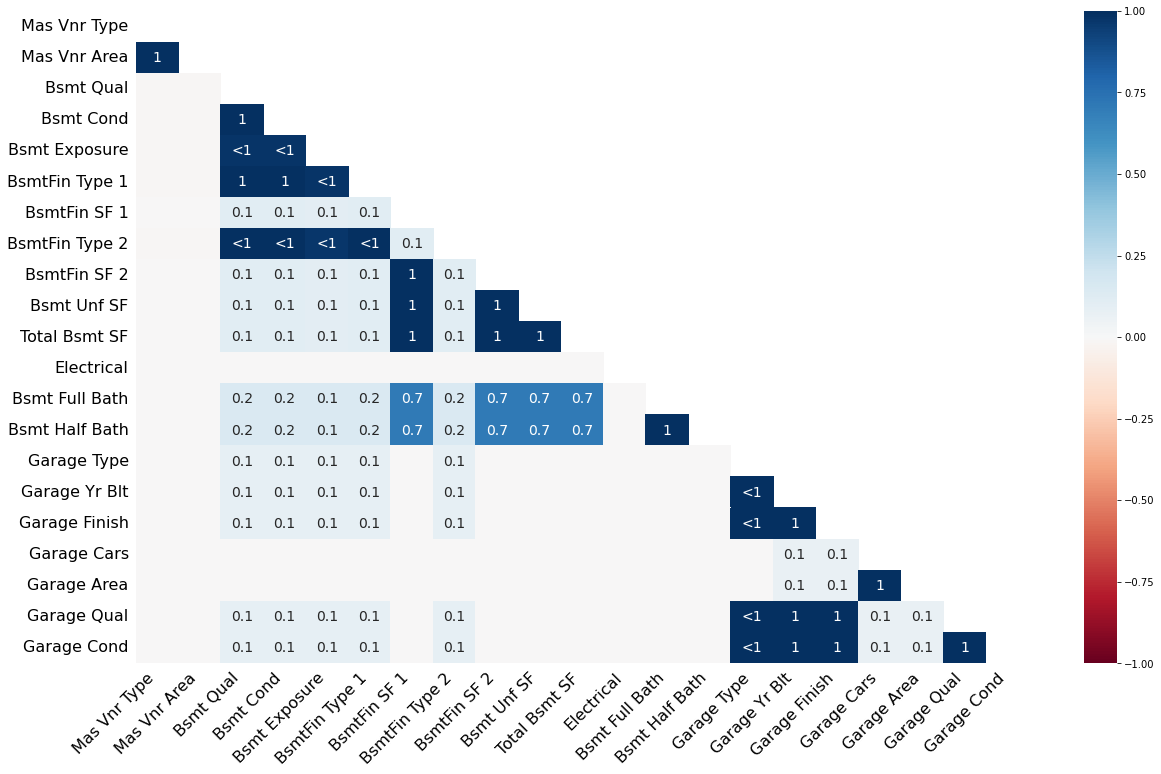

In [ ]:
#heatmap of correlation between columns and level of missingness
msno.heatmap(df)

## ***Step 4: Check for Outliers***

In [ ]:
#select all numeric columns
df_num = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
#get number of columns in numeric subset
df_num.shape

(2930, 38)

In [ ]:
#drop ID and extra index column
df_num = df_num.drop(['Order','PID'], axis=1)

In [ ]:
#confirm columns reduction
df_num.shape

(2930, 36)

In [ ]:
#remove outliers, 95% quantile
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1
df_num = df_num[~((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_num.shape

(2580, 36)

In [ ]:
#basic statistics
df_num.describe()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2559.000000,2579.000000,2579.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.0,2580.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2580.0,2580.000000,2580.000000,2473.000000,2579.000000,2579.000000,2580.000000,2580.00000,2580.000000,2580.0,2580.000000,2580.0,2580.0,2580.000000,2580.000000,2580.000000
mean,55.244186,9568.196512,6.156202,5.567442,1973.092248,1985.214341,102.015240,442.139977,47.124467,561.551377,1050.815820,1141.037597,330.240698,0.0,1471.278295,0.428073,0.056611,1.540698,0.389535,2.800000,1.0,6.320543,0.603101,1978.907400,1.782862,476.350911,92.398062,47.24186,21.685271,0.0,16.003876,0.0,0.0,6.173256,2007.777907,182205.918605
std,41.361316,4089.168827,1.404039,1.079124,29.881971,20.799720,171.080049,435.001219,159.100150,430.493997,405.580906,370.481281,419.070762,0.0,473.544369,0.504213,0.232815,0.538090,0.494843,0.753125,0.0,1.452346,0.631835,25.180014,0.735976,208.779749,119.314827,62.31450,58.974599,0.0,53.811549,0.0,0.0,2.698466,1.315305,77992.262133
min,20.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,1.000000,2006.000000,12789.000000
25%,20.000000,7326.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,229.500000,795.500000,864.000000,0.000000,0.0,1111.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1961.000000,1.000000,325.500000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,4.000000,2007.000000,130000.000000
50%,50.000000,9350.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,379.000000,0.000000,467.000000,990.000000,1072.000000,0.000000,0.0,1426.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1981.000000,2.000000,479.000000,0.000000,29.00000,0.000000,0.0,0.000000,0.0,0.0,6.000000,2008.000000,164000.000000
75%,60.000000,11444.000000,7.000000,6.000000,2002.000000,2004.000000,170.000000,735.500000,0.000000,798.500000,1288.000000,1365.250000,700.000000,0.0,1720.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,72.00000,0.000000,0.0,0.000000,0.0,0.0,8.000000,2009.000000,215775.000000
max,190.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,1159.000000,2288.000000,1085.000000,2336.000000,3206.000000,3228.000000,1862.000000,0.0,3672.000000,2.000000,2.000000,3.000000,2.000000,6.000000,1.0,12.000000,3.000000,2010.000000,5.000000,1488.000000,736.000000,444.00000,429.000000,0.0,396.000000,0.0,0.0,12.000000,2010.000000,611657.000000


## ***Univariate Analysis***- Target Variable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


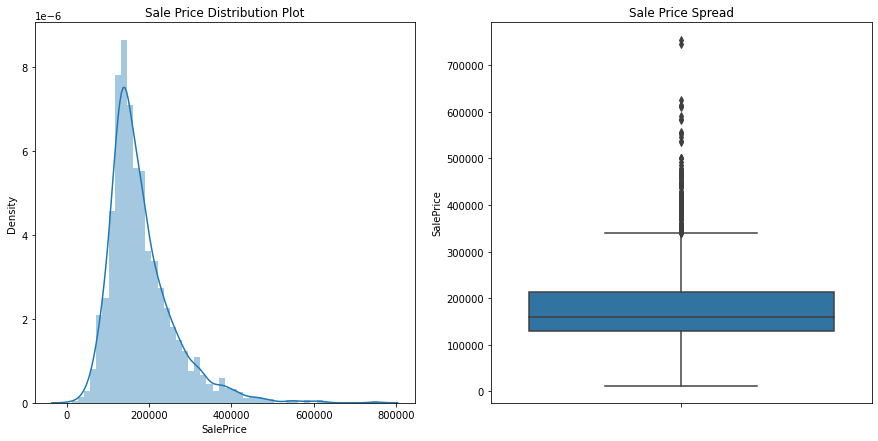

In [ ]:
#look at distribution of target variable
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.title('Sale Price Distribution Plot')
sns.distplot(df.SalePrice)

plt.subplot(1,2,2)
plt.title('Sale Price Spread')
sns.boxplot(y=df.SalePrice)

plt.show()

In [ ]:
df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

***significant right skew***

In [ ]:
#id right-side outliers
q = df["SalePrice"].quantile(0.90)

In [ ]:
#remove right-skew
df_num_q = df_num[df["SalePrice"] < q]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
df_num_q['SalePrice'].describe()

count      2310.000000
mean     162168.199567
std       49645.352120
min       12789.000000
25%      128000.000000
50%      155000.000000
75%      193725.000000
max      281213.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


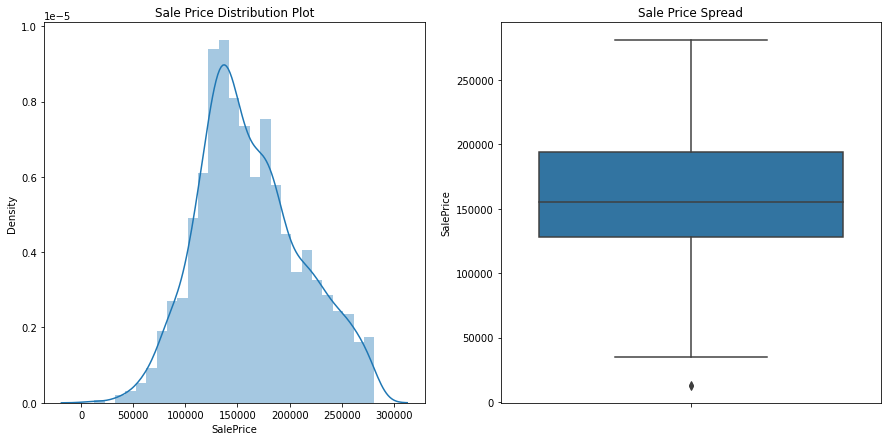

In [ ]:
#generate distribution of treated target
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.title('Sale Price Distribution Plot')
sns.distplot(df_num_q['SalePrice'])

plt.subplot(1,2,2)
plt.title('Sale Price Spread')
sns.boxplot(y=df_num_q['SalePrice'])

# ***Categorical Variables***

In [ ]:
#select categorical columns
df_cat = df.select_dtypes(exclude=("number"))

In [ ]:
#get size of categorical subset
df_cat.shape

(2930, 38)

In [ ]:
#add the target column to categorical subset
df_cat['SalePrice'] = df['SalePrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2930 non-null   object
 1   Street          2930 non-null   object
 2   Lot Shape       2930 non-null   object
 3   Land Contour    2930 non-null   object
 4   Utilities       2930 non-null   object
 5   Lot Config      2930 non-null   object
 6   Land Slope      2930 non-null   object
 7   Neighborhood    2930 non-null   object
 8   Condition 1     2930 non-null   object
 9   Condition 2     2930 non-null   object
 10  Bldg Type       2930 non-null   object
 11  House Style     2930 non-null   object
 12  Roof Style      2930 non-null   object
 13  Roof Matl       2930 non-null   object
 14  Exterior 1st    2930 non-null   object
 15  Exterior 2nd    2930 non-null   object
 16  Mas Vnr Type    2907 non-null   object
 17  Exter Qual      2930 non-null   object
 18  Exter Co

In [ ]:
df_cat.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition,SalePrice
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal,215000
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,105000
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,172000
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal,244000
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal,189900


In [ ]:
df_cat.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition', 'SalePrice'],
      dtype='object')

### ***Distribution of Categorical Variables***

In [ ]:
#look at the number of categories for each variable
df_cat.nunique().sort_values(ascending=False)

SalePrice         1032
Neighborhood        28
Exterior 2nd        17
Exterior 1st        16
Sale Type           10
Condition 1          9
Condition 2          8
House Style          8
Roof Matl            8
Functional           8
MS Zoning            7
Garage Type          6
BsmtFin Type 1       6
Roof Style           6
Sale Condition       6
Foundation           6
BsmtFin Type 2       6
Heating              6
Heating QC           5
Kitchen Qual         5
Garage Cond          5
Garage Qual          5
Bldg Type            5
Bsmt Cond            5
Lot Config           5
Electrical           5
Mas Vnr Type         5
Exter Cond           5
Bsmt Qual            5
Exter Qual           4
Lot Shape            4
Land Contour         4
Bsmt Exposure        4
Utilities            3
Garage Finish        3
Land Slope           3
Paved Drive          3
Street               2
Central Air          2
dtype: int64

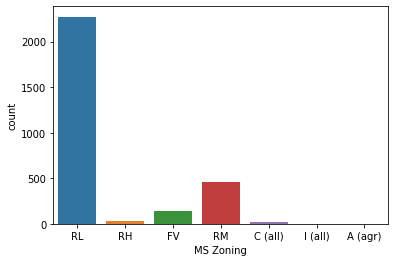

In [ ]:
#distribution of MS Zoning category
sns.countplot(x='MS Zoning', data=df_cat)

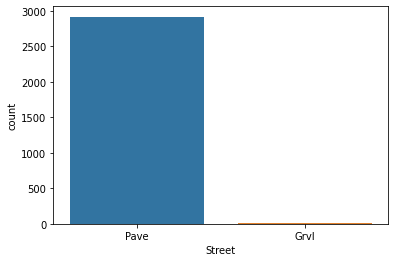

In [ ]:
#distribution of categorical variables
sns.countplot(x='Street', data=df_cat)

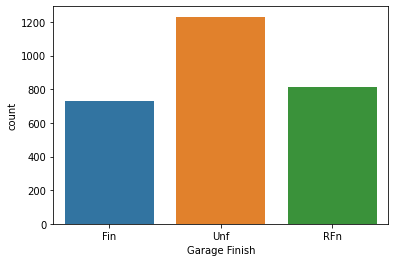

In [ ]:
#distribution of Garage Finish category
sns.countplot(x='Garage Finish', data=df_cat)

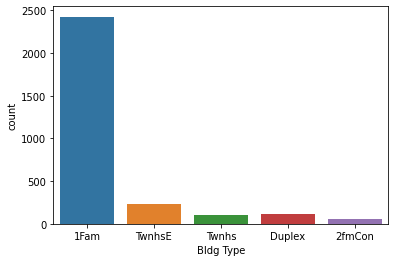

In [ ]:
sns.countplot(x='Bldg Type', data=df_cat)

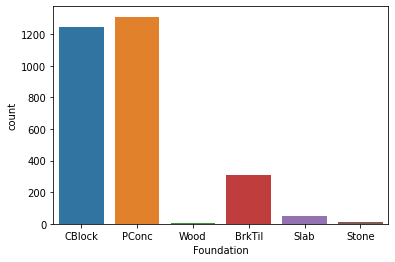

In [ ]:
sns.countplot(x='Foundation', data=df_cat)

## ***Bivariate Analysis*** -Categorical Variable

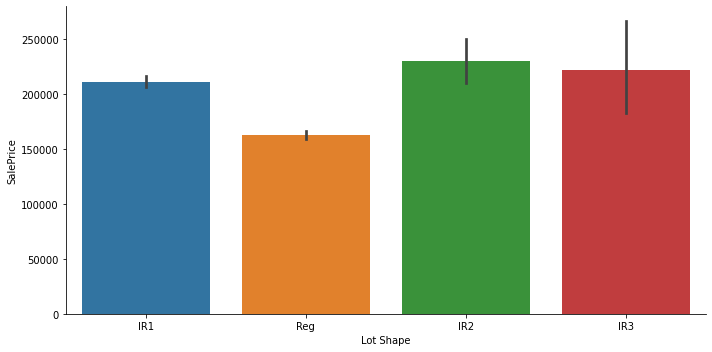

In [ ]:
#association between Lot Shape and average SalePrice - barplot
sns.catplot(x="Lot Shape", y="SalePrice", kind='bar', data=df_cat, height=5, aspect=2)

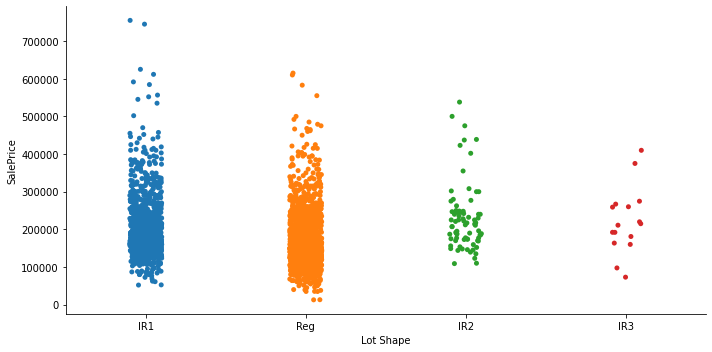

In [ ]:
#association between Lot Shape and average SalePrice- swarm plot
sns.catplot(x="Lot Shape", y="SalePrice", data=df_cat, height=5, aspect=2)

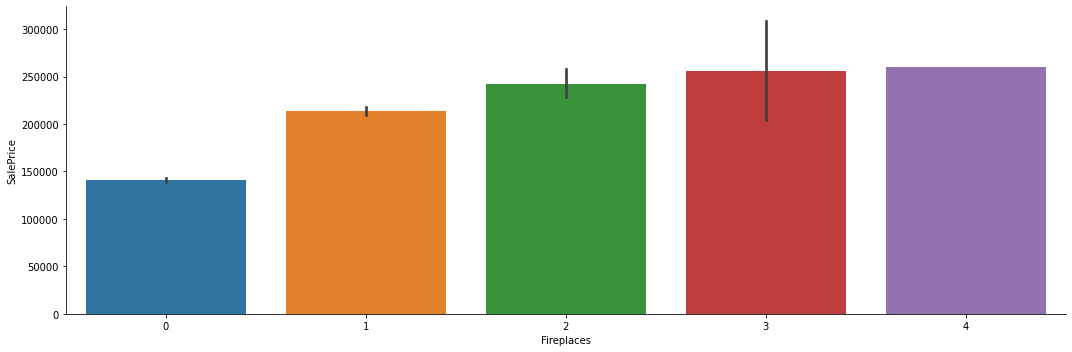

In [ ]:
sns.catplot(x='Fireplaces', y='SalePrice', kind='bar', height=5, aspect=3, data=df)

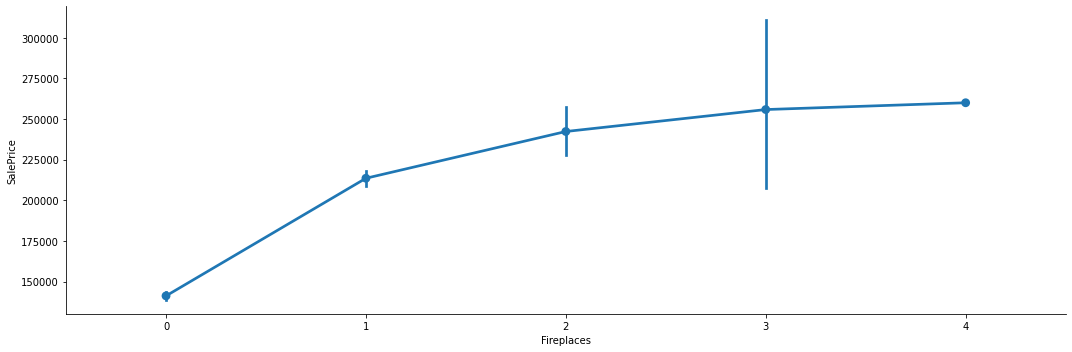

In [ ]:
sns.catplot(x='Fireplaces', y='SalePrice', kind='point', height=5, aspect=3, data=df)

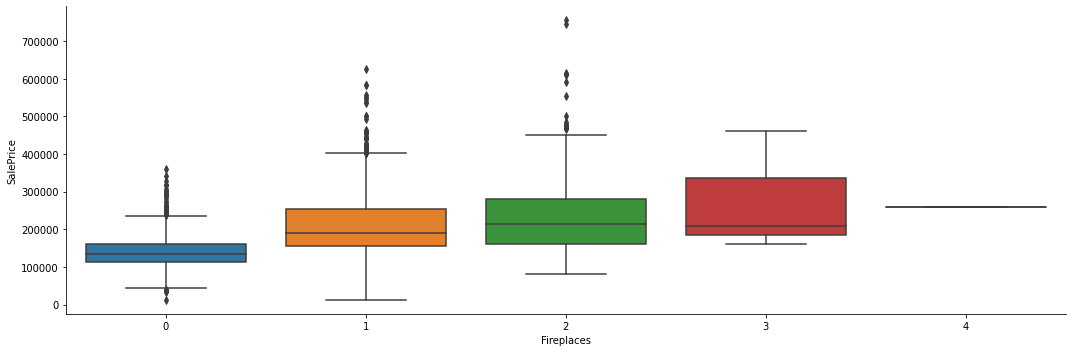

In [ ]:
sns.catplot(x='Fireplaces', y='SalePrice', kind='box', height=5, aspect=3, data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


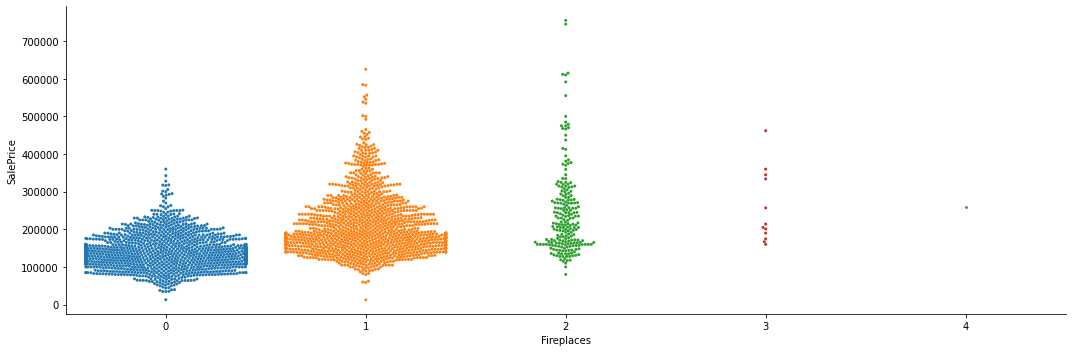

In [ ]:
sns.catplot(x='Fireplaces', y='SalePrice', kind='swarm', height=5, aspect=3, s=3, data=df)

### ***Aggregation of categorical values with sale price***

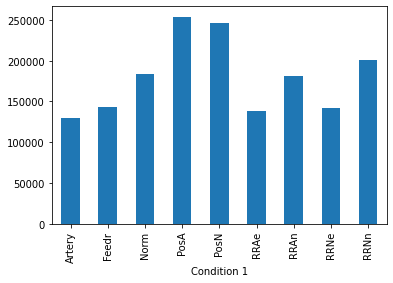

In [ ]:
byCond = df.groupby('Condition 1')['SalePrice'].mean().plot.bar()
byCond

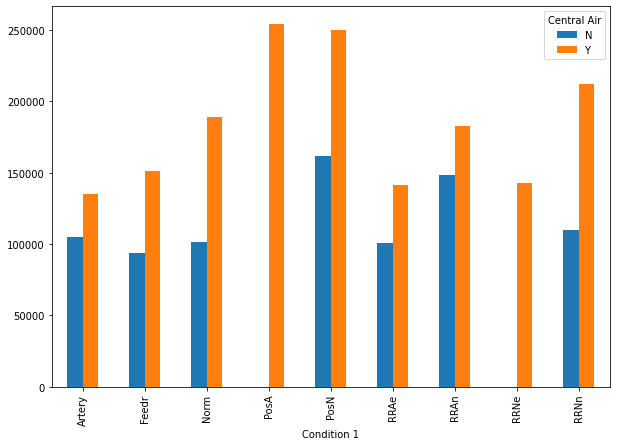

In [ ]:
byCond = df_cat.groupby(['Condition 1', 'Central Air'])['SalePrice'].mean().unstack().plot.bar(figsize=(10, 7))
byCond

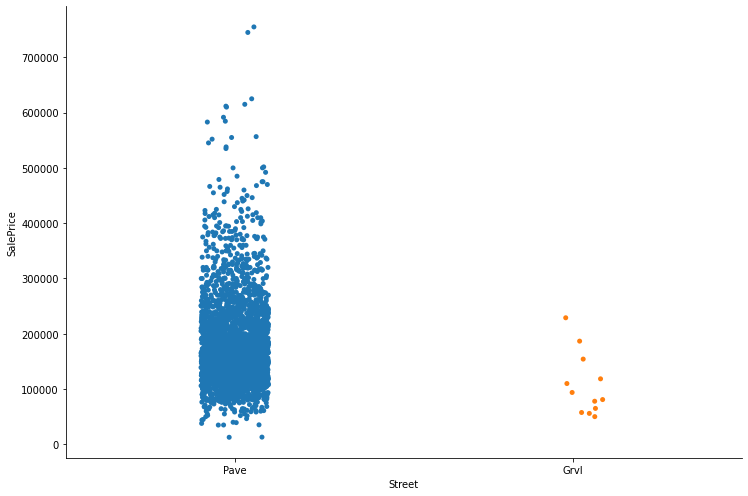

In [ ]:
#categorical Steet type and Saleprice catplot -strip
g = sns.catplot(x="Street", y="SalePrice", data=df, height=7, aspect=1.5)

In [ ]:
stats.ttest_ind(df[df['Street']=='Pave']['SalePrice'], df[df['Street']=='Grvl']['SalePrice'])

Ttest_indResult(statistic=3.2263671999804093, pvalue=0.0012675372074674354)

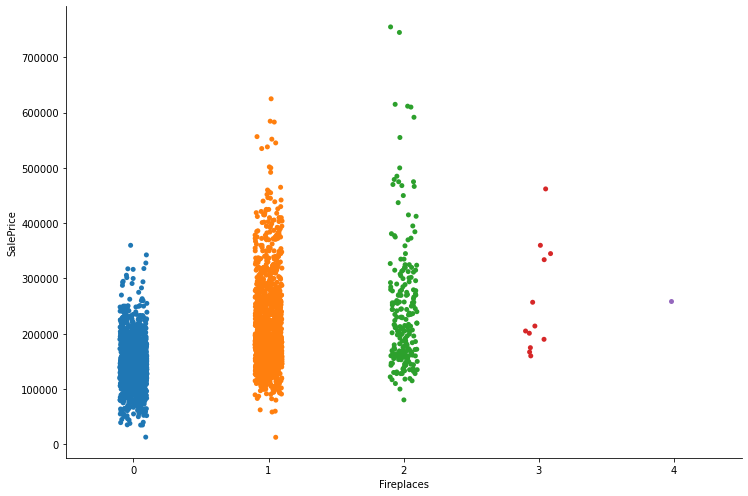

In [ ]:
g = sns.catplot(x="Fireplaces", y="SalePrice", data=df, height=7, aspect=1.5)

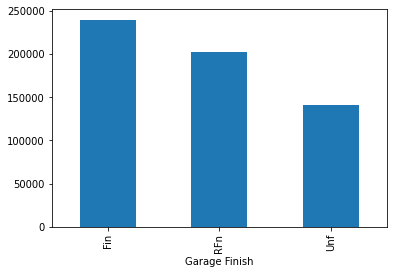

In [ ]:
df_cat.groupby('Garage Finish')['SalePrice'].mean().plot.bar()

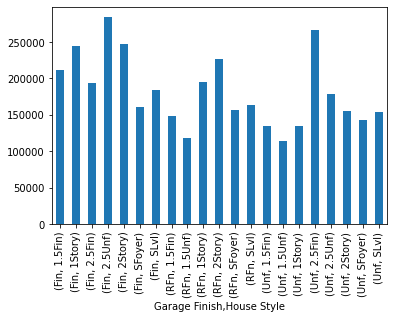

In [ ]:
df_cat.groupby(['Garage Finish', 'House Style'])['SalePrice'].mean().plot.bar()

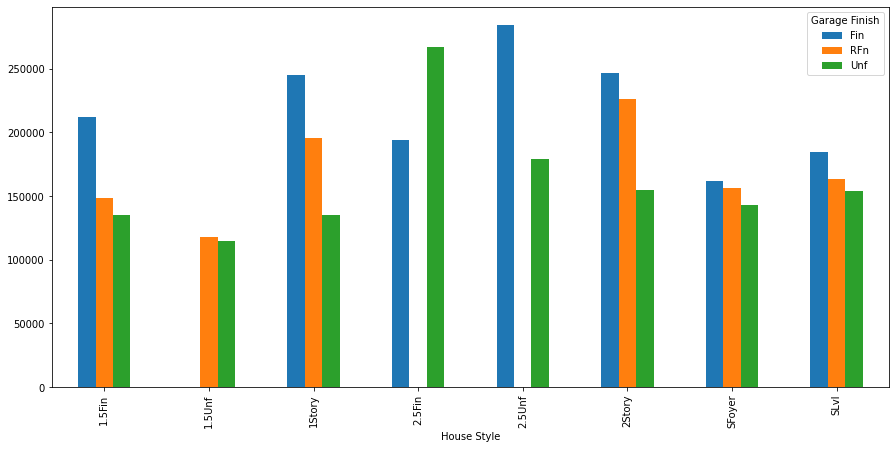

In [ ]:
df_cat.groupby(['House Style','Garage Finish'])['SalePrice'].mean().unstack().plot.bar(figsize=(15, 7))

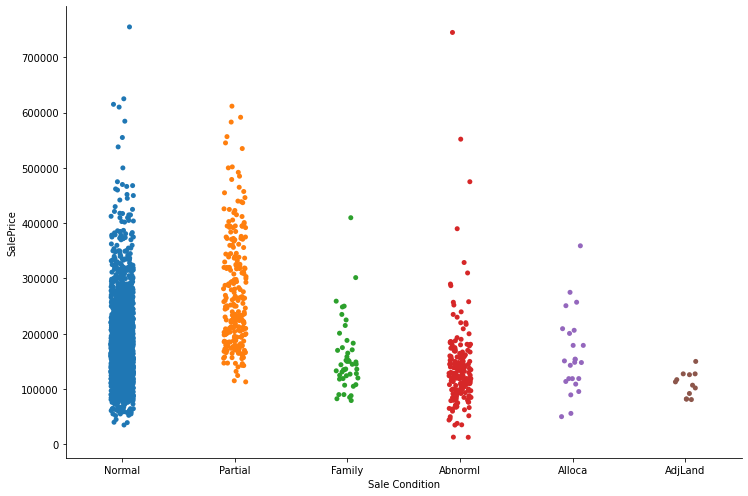

In [ ]:
g = sns.catplot(x="Sale Condition", y="SalePrice", data=df, height=7, aspect=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


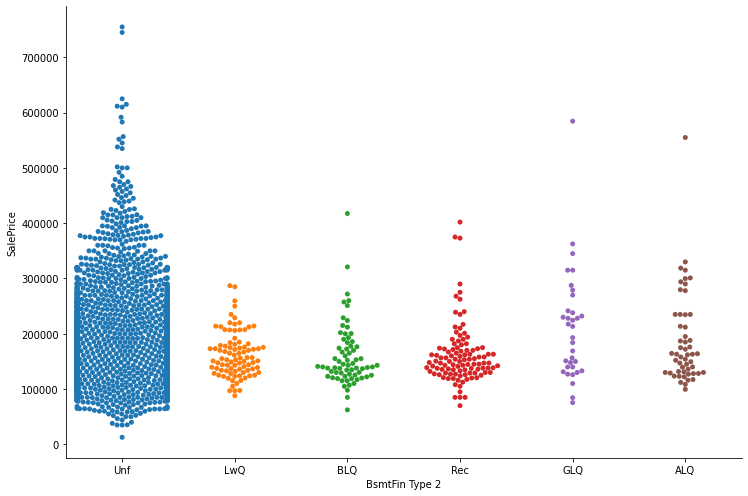

In [ ]:

g = sns.catplot(x="BsmtFin Type 2", y="SalePrice", data=df, kind='swarm', height=7, aspect=1.5)

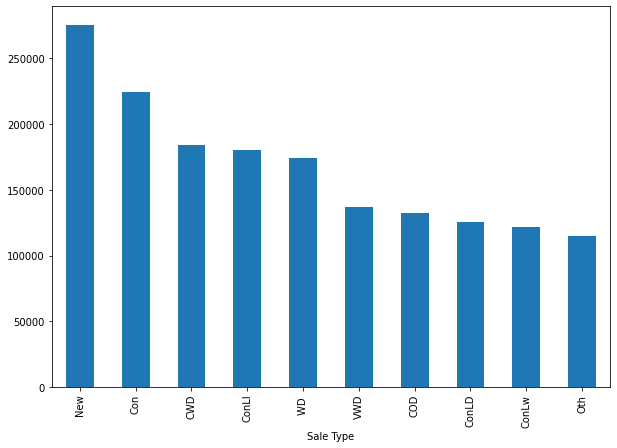

In [ ]:
df.groupby('Sale Type')['SalePrice'].mean().sort_values(ascending=False).plot.bar(figsize=(10, 7))

## ***Distribution of Numeric Variables***

In [ ]:
df_num = df.select_dtypes("number")

In [ ]:
df_num.head()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900


In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   Lot Area         2930 non-null   int64  
 4   Overall Qual     2930 non-null   int64  
 5   Overall Cond     2930 non-null   int64  
 6   Year Built       2930 non-null   int64  
 7   Year Remod/Add   2930 non-null   int64  
 8   Mas Vnr Area     2907 non-null   float64
 9   BsmtFin SF 1     2929 non-null   float64
 10  BsmtFin SF 2     2929 non-null   float64
 11  Bsmt Unf SF      2929 non-null   float64
 12  Total Bsmt SF    2929 non-null   float64
 13  1st Flr SF       2930 non-null   int64  
 14  2nd Flr SF       2930 non-null   int64  
 15  Low Qual Fin SF  2930 non-null   int64  
 16  Gr Liv Area      2930 non-null   int64  
 17  Bsmt Full Bath

In [ ]:
df_num.corr()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,-0.032321,-0.002773,0.005780,-0.028719,-0.013201,-0.000417,0.013589,-0.009342,-0.042539,0.024978,-0.044985,-0.039749,0.015424,-0.017685,0.002612,-0.019156,-0.051160,-0.036185,-0.035435,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,-0.001145,-0.087707,-0.189642,-0.141902,-0.003289,0.056940,-0.107579,-0.037759,0.004328,-0.171431,-0.166636,0.006345,0.076470,-0.068981,-0.108056,-0.256829,-0.237484,-0.210606,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,-0.070946,-0.130421,-0.219445,-0.247828,0.304237,0.025765,0.068061,0.013701,-0.003329,0.134631,0.175879,-0.019208,0.257698,0.031898,-0.049955,0.088754,-0.045883,-0.103239,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Area,0.031354,0.034868,-0.204613,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,0.083150,0.023658,0.253589,0.332235,0.032996,0.000812,0.285599,0.125877,0.026903,0.127433,0.035497,0.136569,-0.020301,0.216597,0.256989,-0.008952,0.179512,0.212822,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,-0.041287,0.270058,0.547294,0.477837,0.241402,-0.048680,0.570556,0.167858,-0.041647,0.522263,0.268853,0.063291,-0.159744,0.380693,0.393007,0.570569,0.599545,0.563503,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,0.041134,-0.136819,-0.173344,-0.157052,0.006218,0.009175,-0.115643,-0.042766,0.084455,-0.214316,-0.088127,-0.006137,-0.086386,-0.089816,-0.031702,-0.326017,-0.181557,-0.153754,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,-0.027415,0.128998,0.407526,0.310463,0.016828,-0.144282,0.241726,0.211849,-0.030626,0.469406,0.269268,-0.055093,-0.137852,0.111919,0.170672,0.834849,0.537443,0.480131,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,-0.062129,0.164805,0.297481,0.242108,0.158939,-0.060365,0.316855,0.134387,-0.046292,0.457266,0.211771,-0.021536,-0.142404,0.197528,0.133322,0.652310,0.425403,0.376438,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,-0.016019,0.091668,0.397040,0.395736,0.121805,-0.057701,0.403611,0.140113,0.015421,0.260153,0.192965,0.080546,-0.050998,0.279563,0.272068,0.254784,0.360159,0.373458,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.032321,-0.098375,-0.060075,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,-0.054129,-0.477875,0.536547,0.457472,-0.164014,-0.066173,0.209633,0.640020,0.077548,0.077772,-0.008457,-0.118959,-0.086738

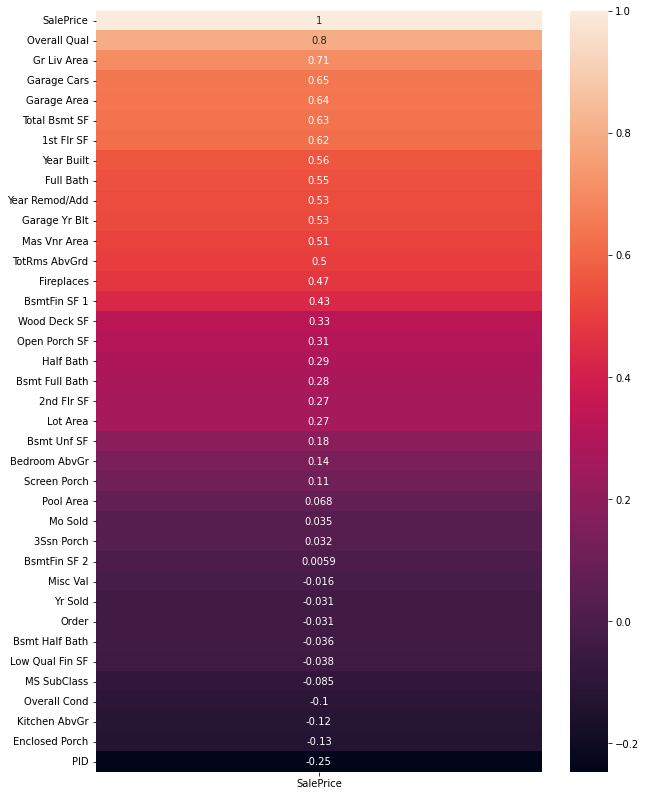

In [ ]:
fig, ax = plt.subplots(figsize=(10,14))
price_corr = df_num.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
sns.heatmap(price_corr, annot=True, ax=ax) 

In [ ]:
price_corr[:10]

,SalePrice
SalePrice,1.000000
Overall Qual,0.799262
Gr Liv Area,0.706780
Garage Cars,0.647877
Garage Area,0.640401
Total Bsmt SF,0.632280
1st Flr SF,0.621676
Year Built,0.558426
Full Bath,0.545604
Year Remod/Add,0.532974


In [ ]:
hi_corr = price_corr[:10]

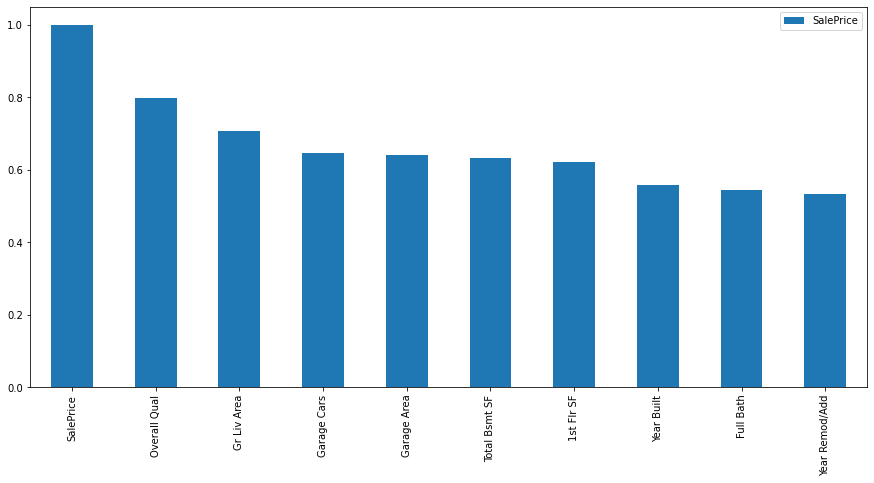

In [ ]:
hi_corr.plot.bar(figsize=(15, 7))

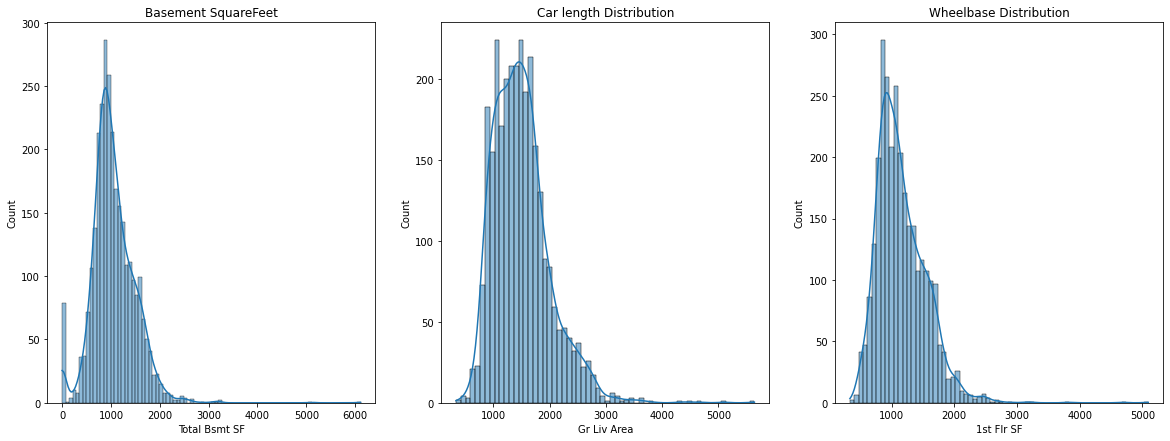

In [ ]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.title('Basement SquareFeet')
sns.histplot(df['Total Bsmt SF'], kde=True)

plt.subplot(1,3,2)
plt.title('Car length Distribution')
sns.histplot(df['Gr Liv Area'], kde=True)

plt.subplot(1,3,3)
plt.title('Wheelbase Distribution')
sns.histplot(df['1st Flr SF'], kde=True)

plt.show()

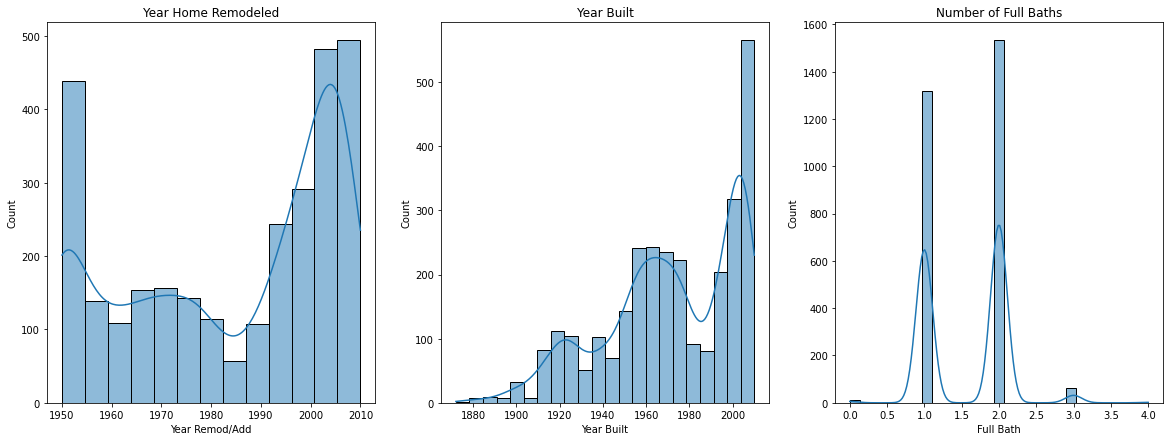

In [ ]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.title('Year Home Remodeled')
sns.histplot(df['Year Remod/Add'], kde=True)

plt.subplot(1,3,2)
plt.title('Year Built')
sns.histplot(df['Year Built'], kde=True)

plt.subplot(1,3,3)
plt.title('Number of Full Baths')
sns.histplot(df['Full Bath'], kde=True)

plt.show()

In [ ]:
df_num['YearGroup'] = pd.cut(df_num['Year Built'], [0, 1900, 1920, 1940, 1960, 1980, 2000, 2100], labels=['<1900', '<1920', '<1940', '<1960', '<1980', '<2000', '<2100'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
byYear = df_num.groupby(['YearGroup','Full Bath'])['SalePrice'].mean()

In [ ]:
byYear.unstack()

Full Bath,0,1,2,3,4
YearGroup,,,,,
<1900,NaN,115053.576923,143567.307692,286666.666667,NaN
<1920,NaN,112313.644628,140758.636364,199000.000000,NaN
<1940,61000.000000,123158.981132,155501.089552,321650.000000,NaN
<1960,35311.000000,131855.547739,154437.011364,233164.800000,NaN
<1980,176945.857143,136043.558411,175158.507519,221680.000000,NaN
<2000,262500.000000,166887.681159,220602.422680,389208.333333,241875.0
<2100,194201.000000,196127.703125,250717.805296,357829.928571,NaN


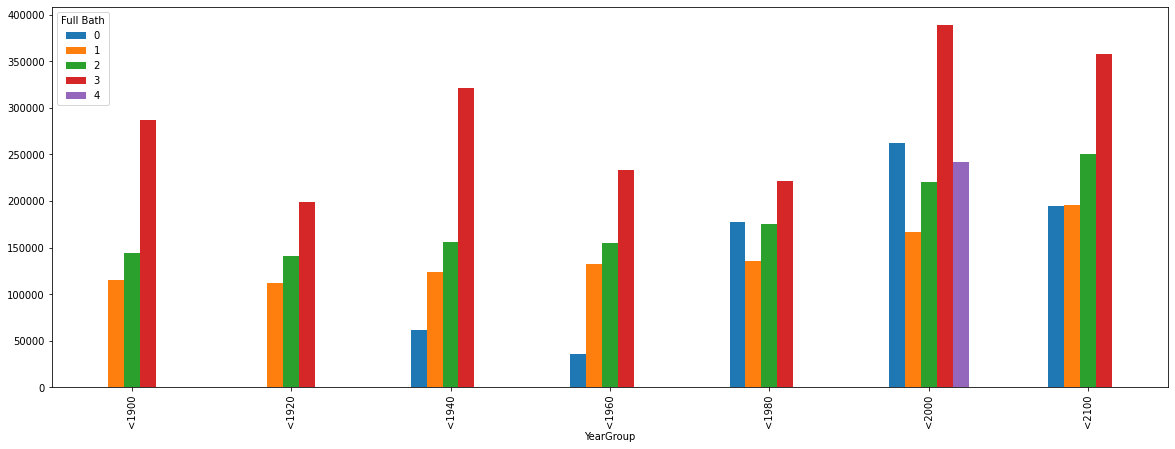

In [ ]:
byYear.unstack().plot.bar(figsize=(20, 7))

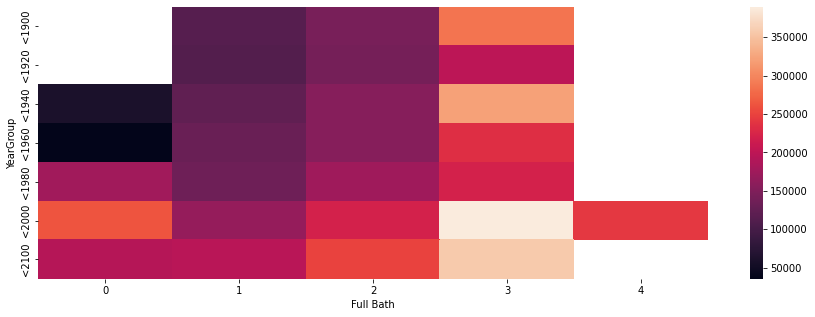

In [ ]:
plt.figure(figsize = (15,5))
sns.heatmap(byYear.unstack())

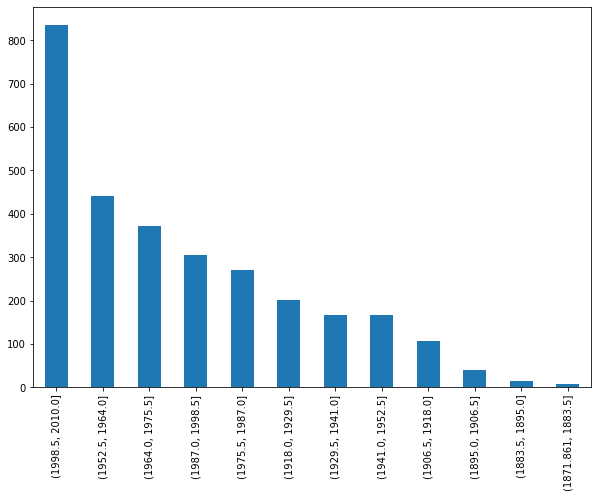

In [ ]:
df_num['Year Built'].value_counts(bins=12).plot.bar(figsize=(10, 7))

In [ ]:
df['Year Built']

0       1960
1       1961
2       1958
3       1968
4       1997
        ... 
2925    1984
2926    1983
2927    1992
2928    1974
2929    1993
Name: Year Built, Length: 2930, dtype: int64

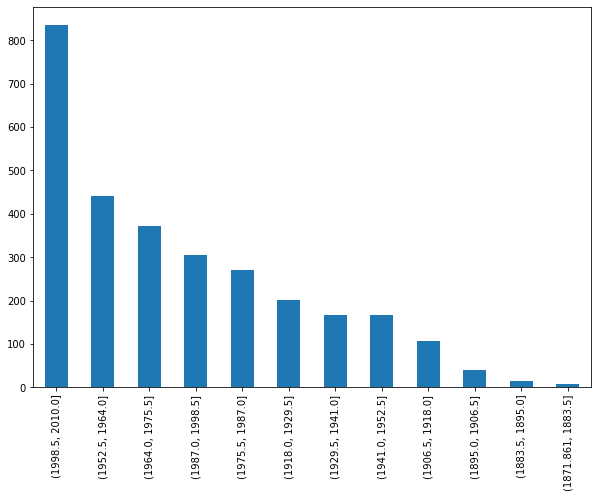

In [ ]:
df_num['Year Built'].value_counts(bins=12).plot.bar(figsize=(10, 7))

In [ ]:
df['YearCount'] = df['Year Built'].map(df['Year Built'].value_counts(bins=12))

In [ ]:
df['YearCount'] 

0       440
1       440
2       440
3       373
4       305
       ... 
2925    271
2926    271
2927    305
2928    373
2929    305
Name: YearCount, Length: 2930, dtype: int64

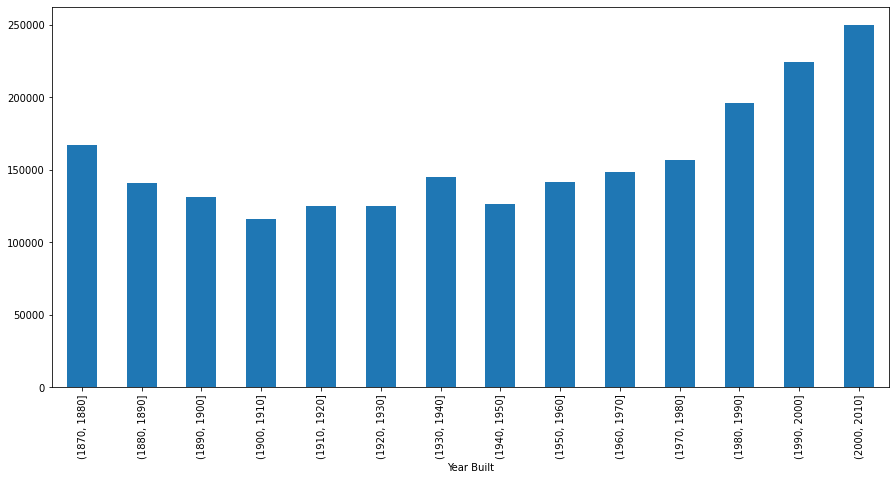

In [ ]:
bins = pd.cut(df['Year Built'], [1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])

df.groupby(bins)['SalePrice'].agg('mean').plot.bar(figsize=(15, 7))

In [ ]:
df['Year Built'].value_counts(bins=12)

(1998.5, 2010.0]      835
(1952.5, 1964.0]      440
(1964.0, 1975.5]      373
(1987.0, 1998.5]      305
(1975.5, 1987.0]      271
(1918.0, 1929.5]      201
(1929.5, 1941.0]      168
(1941.0, 1952.5]      166
(1906.5, 1918.0]      108
(1895.0, 1906.5]       39
(1883.5, 1895.0]       15
(1871.861, 1883.5]      9
Name: Year Built, dtype: int64

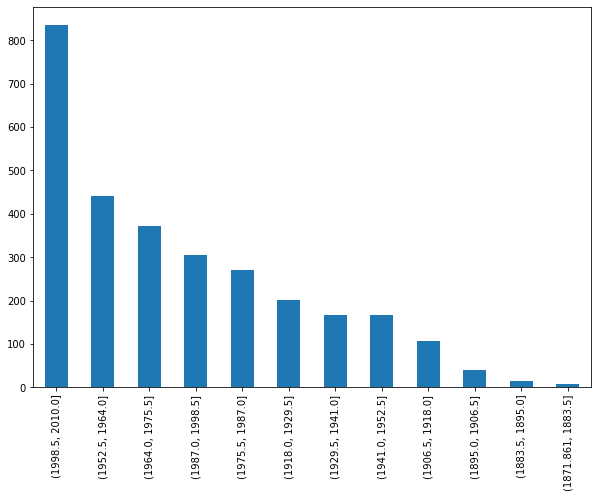

In [ ]:
df_num['Year Built'].value_counts(bins=12).plot.bar(figsize=(10, 7))

In [ ]:
df_num_year = df_num.groupby(['Year Built','Full Bath'])['SalePrice'].mean()
df_num_year

Year Built  Full Bath
1872        2            122000.000000
1875        1             94000.000000
1879        2            185000.000000
1880        1            173659.666667
            2            117500.000000
                             ...      
2008        3            533966.500000
2009        1            315646.000000
            2            273745.391304
2010        1            331174.000000
            2            187000.000000
Name: SalePrice, Length: 263, dtype: float64

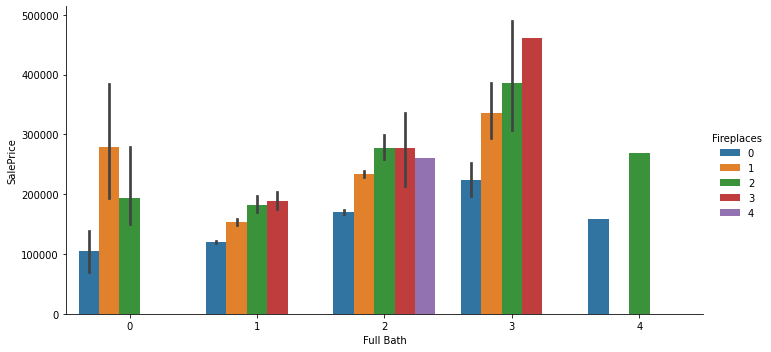

In [ ]:
sns.catplot(x='Full Bath', y='SalePrice', kind='bar', hue='Fireplaces', data=df, height=5, aspect=2)

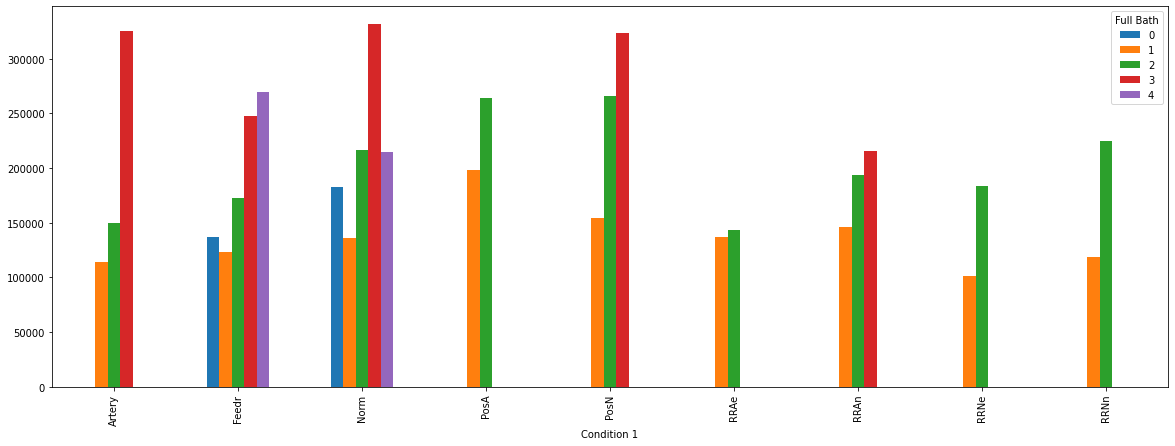

In [ ]:
df.groupby(['Condition 1', 'Full Bath'])['SalePrice'].mean().unstack().plot.bar(figsize=(20, 7))

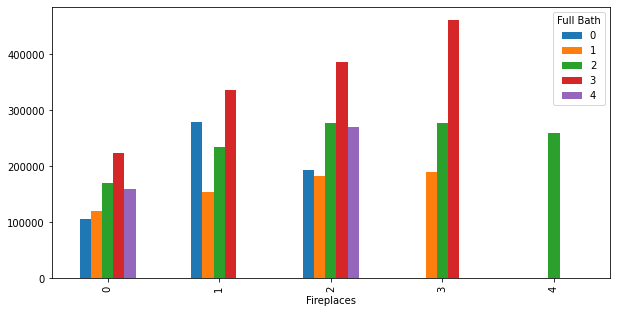

In [ ]:
df.groupby(['Fireplaces', 'Full Bath'])['SalePrice'].mean().unstack().plot.bar(figsize=(10,5))

In [ ]:
df_num.isnull().sum()

Order                0
PID                  0
MS SubClass          0
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
YearGroup            0
dtype: int64

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Order            2930 non-null   int64   
 1   PID              2930 non-null   int64   
 2   MS SubClass      2930 non-null   int64   
 3   Lot Area         2930 non-null   int64   
 4   Overall Qual     2930 non-null   int64   
 5   Overall Cond     2930 non-null   int64   
 6   Year Built       2930 non-null   int64   
 7   Year Remod/Add   2930 non-null   int64   
 8   Mas Vnr Area     2907 non-null   float64 
 9   BsmtFin SF 1     2929 non-null   float64 
 10  BsmtFin SF 2     2929 non-null   float64 
 11  Bsmt Unf SF      2929 non-null   float64 
 12  Total Bsmt SF    2929 non-null   float64 
 13  1st Flr SF       2930 non-null   int64   
 14  2nd Flr SF       2930 non-null   int64   
 15  Low Qual Fin SF  2930 non-null   int64   
 16  Gr Liv Area      2930 non-null   int64   


In [ ]:
#convert categorical value to numeric
df_num['Bedroom AbvGr']=pd.Categorical(df_num['Bedroom AbvGr'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


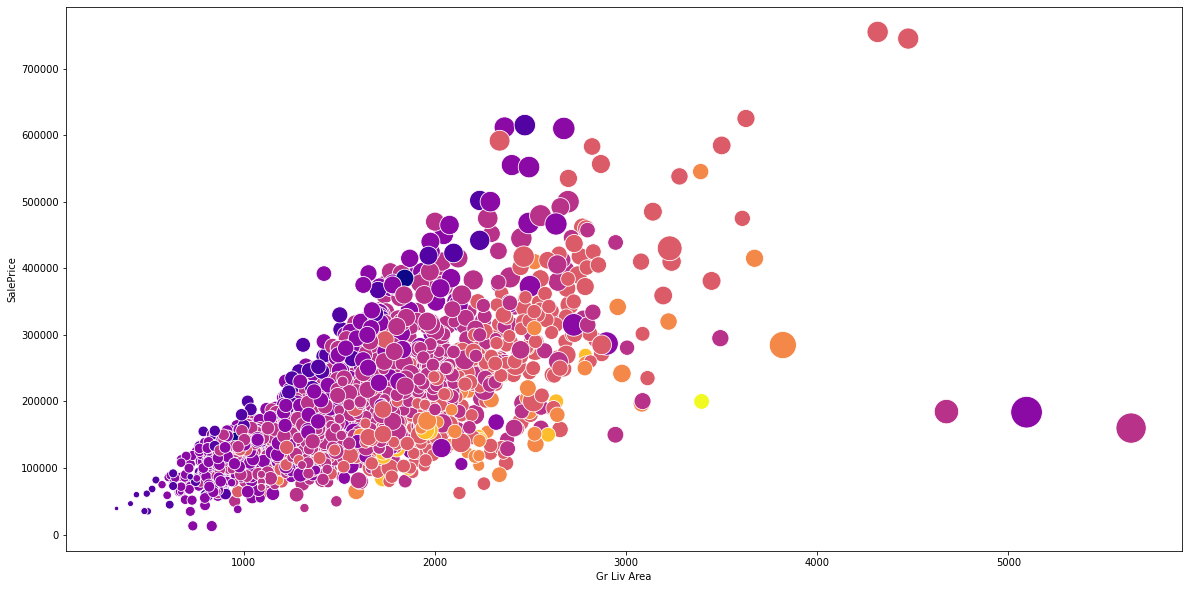

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 10))

# use the scatterplot function to build the bubble map
sns.scatterplot(data=df, x="Gr Liv Area", y="SalePrice", c=df_num['Bedroom AbvGr'].cat.codes, size="1st Flr SF", cmap="plasma", legend=False, sizes=(20, 1000))

# show the graph
plt.show()